In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries



In [ ]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [ ]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [ ]:

#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:
#TASK 8 - Plotting Function
def plot_routes(individual, title="Routes"):
  plt.figure()
  for(x,y) in locations:
    plt.plot(x,y,'bo')
  plt.plot(depot[0],depot[1],'rs')


In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	575.557	4.97067
1  	213   	552.841	5.10811
2  	243   	545.751	5.10811
3  	232   	540.316	7.60382
4  	233   	535.859	3.6431 
5  	218   	531.56 	2.54568
6  	213   	523.279	2.54568
7  	233   	519.805	6.11459
8  	219   	515.939	6.05141
9  	209   	507.192	2.79092
10 	224   	499.061	2.79092
11 	230   	492.338	2.59157
12 	230   	482.461	2.79092
13 	217   	462.914	2.59481
14 	231   	454.795	2.65662
15 	250   	451.705	4.46704
16 	238   	446.149	1.52113
17 	236   	438.636	1.52113
18 	225   	430.552	4.49382
19 	225   	422.982	1.1266 
20 	209   	413.468	3.05681
21 	232   	421.15 	3.62682
22 	237   	421.241	1.82074
23 	217   	411.144	2.68473
24 	227   	408.568	3.93152
25 	246   	403.967	3.30043
26 	233   	401.086	3.93152
27 	219   	390.225	9.37816
28 	229   	384.021	6.33187
29 	223   	374.88 	7.40389
30 	238   	368.617	3.4848 
31 	225   	361.864	5.20843
32 	221   	359.486	6.20604
33 	243   	352.967	4.81512
34 	232   	344.674	6.20604
35 	244   	334.351	2.5663 
3

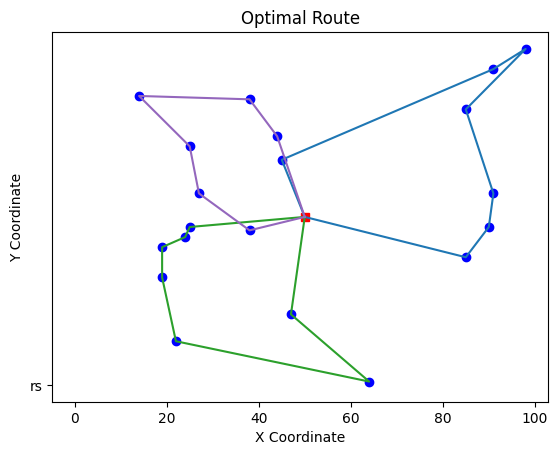

In [ ]:
#Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.